In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from scipy import stats, optimize
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.linear_model import Ridge, LassoLars, BayesianRidge, ARDRegression, Lars
from sklearn.linear_model import RANSACRegressor, ElasticNet
from sklearn.linear_model import PassiveAggressiveRegressor, Perceptron
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression
from sklearn.linear_model import LassoCV, RidgeCV

from sklearn.svm import LinearSVR
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import explained_variance_score, r2_score, median_absolute_error, mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The numpy version is {}.'.format(np.__version__))

The scikit-learn version is 0.18.1.
The pandas version is 0.19.2.
The numpy version is 1.12.0.


In [2]:
goal_features = ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies','robbbPerPop',
                 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop',
                 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop', 'nonViolPerPop']

non_predictive_features = ['communityname', 'state', 'countyCode', 'communityCode', 'fold']

In [3]:
df = pd.read_csv('../datasets/UnnormalizedCrimeData.csv');
df = df.replace('?',np.NAN)
features = [x for x in df.columns if x not in goal_features and x not in non_predictive_features]
len(features)

124

In [4]:
def drop_rows_with_null_goal_feature(old_df, feature):
    new_df = old_df.dropna(subset=[feature])
    return new_df

# Distribution of output for each crime

Let us see the distribution of all the 4 crimes. The idea is to remove the outliers so that we get more accuracy

count    2215.000000
mean        7.764786
std        58.166468
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max      1946.000000
Name: murders, dtype: float64


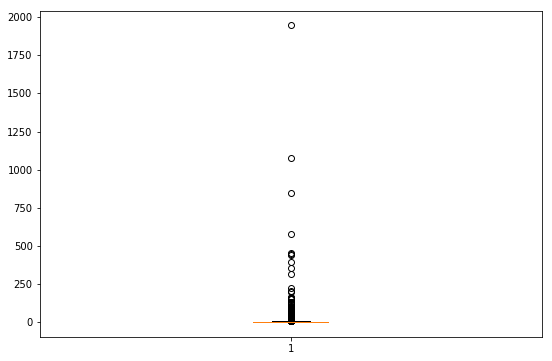

In [5]:
goal_feature = 'murders'
goal_df = drop_rows_with_null_goal_feature(df, goal_feature)
print goal_df['murders'].describe()

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(goal_df['murders'])


#plt.boxplot(goal_df['murders'], sym='k.', showfliers=True, showmeans=True, showcaps=True, showbox=True)
plt.show()

count    2007.000000
mean       28.046338
std       105.616135
min         0.000000
25%         2.000000
50%         7.000000
75%        19.000000
max      2818.000000
Name: rapes, dtype: float64


/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


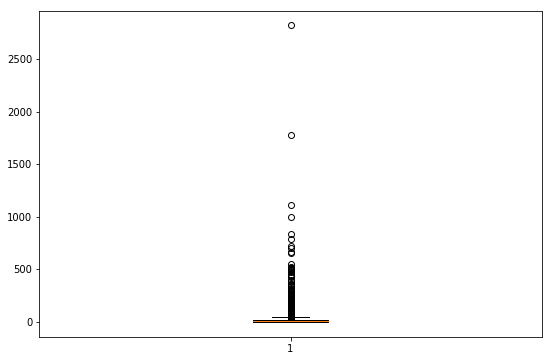

In [6]:
goal_feature = 'rapes'
goal_df = drop_rows_with_null_goal_feature(df, goal_feature)
goal_df[[goal_feature]] = goal_df[[goal_feature]].apply(pd.to_numeric)

print goal_df[goal_feature].describe()

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(goal_df[goal_feature])

#plt.boxplot(goal_df['murders'], sym='k.', showfliers=True, showmeans=True, showcaps=True, showbox=True)
plt.show()

count     2214.000000
mean       237.952123
std       2250.720788
min          0.000000
25%          5.000000
50%         19.000000
75%         70.000000
max      86001.000000
Name: robberies, dtype: float64


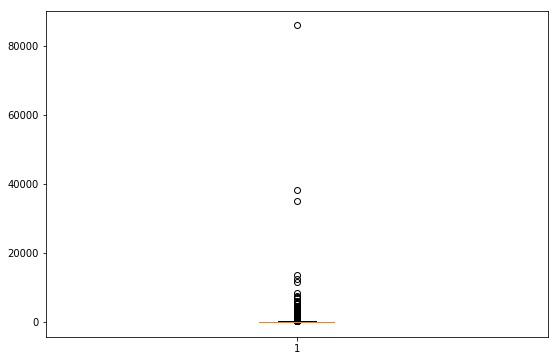

In [7]:
goal_feature = 'robberies'
goal_df = drop_rows_with_null_goal_feature(df, goal_feature)
goal_df[[goal_feature]] = goal_df[[goal_feature]].apply(pd.to_numeric)

print goal_df[goal_feature].describe()

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(goal_df[goal_feature])

#plt.boxplot(goal_df['murders'], sym='k.', showfliers=True, showmeans=True, showcaps=True, showbox=True)
plt.show()

count     2202.000000
mean       326.528156
std       1987.947941
min          0.000000
25%         18.000000
50%         56.000000
75%        180.000000
max      62778.000000
Name: assaults, dtype: float64


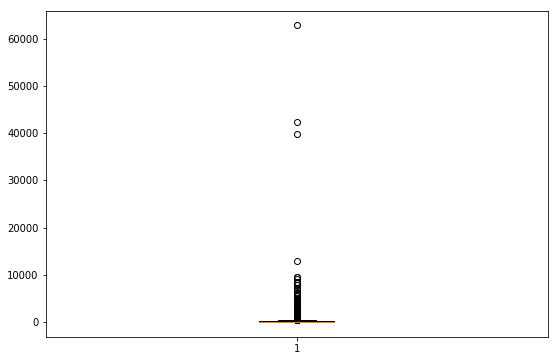

In [8]:
goal_feature = 'assaults'
goal_df = drop_rows_with_null_goal_feature(df, goal_feature)
goal_df[[goal_feature]] = goal_df[[goal_feature]].apply(pd.to_numeric)

print goal_df[goal_feature].describe()

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(goal_df[goal_feature])

#plt.boxplot(goal_df['murders'], sym='k.', showfliers=True, showmeans=True, showcaps=True, showbox=True)
plt.show()

count     2212.000000
mean       761.236890
std       3111.702756
min          2.000000
25%         95.000000
50%        205.000000
75%        508.000000
max      99207.000000
Name: burglaries, dtype: float64


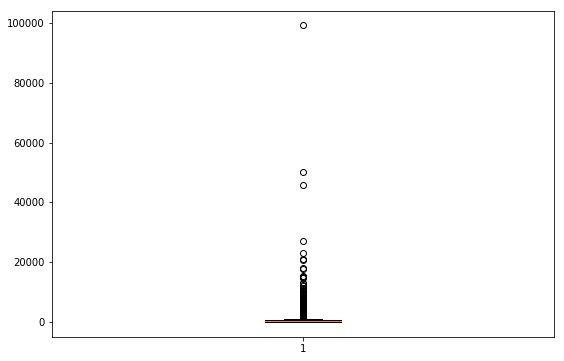

In [9]:
goal_feature = 'burglaries'
goal_df = drop_rows_with_null_goal_feature(df, goal_feature)
goal_df[[goal_feature]] = goal_df[[goal_feature]].apply(pd.to_numeric)

print goal_df[goal_feature].describe()

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(goal_df[goal_feature])

#plt.boxplot(goal_df['murders'], sym='k.', showfliers=True, showmeans=True, showcaps=True, showbox=True)
plt.show()

In [10]:
clf = Pipeline([
  ('feature_selection', SelectKBest(k=96, score_func=f_regression)),
  ('regression', (Ridge()))
])

goal_feature = 'murders'


goal_df = drop_rows_with_null_goal_feature(df, goal_feature)
goal_df[[goal_feature]] = goal_df[[goal_feature]].apply(pd.to_numeric)
goal_df = goal_df[goal_df.murders <= goal_df.murders.quantile(.98)]
print len(goal_df)
#print goal_df.describe()
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(goal_df[features])
imputed_data = imr.transform(goal_df[features]);

df_X_train, df_X_test, df_y_train, df_y_test = \
        train_test_split(imputed_data, goal_df[goal_feature], test_size=0.3)


mse_cv = cross_val_score(estimator = clf, X=df_X_train, y=df_y_train, scoring='neg_mean_squared_error')
r2_cv = cross_val_score(estimator=clf, X=df_X_train, y=df_y_train, scoring='r2')

print "Cross Validation Score MSE and R_2 are {0} and {1}".format(mse_cv.mean(), r2_cv.mean())
clf.fit(df_X_train, df_y_train)


mse_train = mean_squared_error(df_y_train, clf.predict(df_X_train))
r2_train = r2_score(df_y_train, clf.predict(df_X_train))

print "Training MSE error & R_2 SCore are {0} and {1} ".format(mse_train,  r2_train)

mse = mean_squared_error(df_y_test, clf.predict(df_X_test))
r2_sc = r2_score(df_y_test, clf.predict(df_X_test))
print "Test MSE error & R_2 SCore are {0} and {1} ".format(mse,  r2_sc)

2170
Cross Validation Score MSE and R_2 are -14.7826431564 and 0.740141086644
Training MSE error & R_2 SCore are 8.23238245053 and 0.852162192363 
Test MSE error & R_2 SCore are 11.5293803408 and 0.670489411585 


In [14]:
clf = Pipeline([
  ('feature_selection', SelectKBest(k=100, score_func=f_regression)),
  ('regression', GradientBoostingRegressor())
])

goal_feature = 'rapes'

goal_df = drop_rows_with_null_goal_feature(df, goal_feature)
goal_df[[goal_feature]] = goal_df[[goal_feature]].apply(pd.to_numeric)
goal_df = goal_df[goal_df.murders <= goal_df.murders.quantile(.98)]
print len(goal_df)
#print goal_df.describe()
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(goal_df[features])
imputed_data = imr.transform(goal_df[features]);

df_X_train, df_X_test, df_y_train, df_y_test = \
        train_test_split(imputed_data, goal_df[goal_feature], test_size=0.3)


mse_cv = cross_val_score(estimator = clf, X=df_X_train, y=df_y_train, scoring='neg_mean_squared_error')
r2_cv = cross_val_score(estimator=clf, X=df_X_train, y=df_y_train, scoring='r2')

print "Cross Validation Score MSE and R_2 are {0} and {1}".format(mse_cv.mean(), r2_cv.mean())
clf.fit(df_X_train, df_y_train)


mse_train = mean_squared_error(df_y_train, clf.predict(df_X_train))
r2_train = r2_score(df_y_train, clf.predict(df_X_train))

print "Training MSE error & R_2 SCore are {0} and {1} ".format(mse_train,  r2_train)

mse = mean_squared_error(df_y_test, clf.predict(df_X_test))
r2_sc = r2_score(df_y_test, clf.predict(df_X_test))
print "Test MSE error & R_2 SCore are {0} and {1} ".format(mse,  r2_sc)

1966
Cross Validation Score MSE and R_2 are -296.342974737 and 0.810639416464
Training MSE error & R_2 SCore are 33.4020255817 and 0.97783809487 
Test MSE error & R_2 SCore are 367.478470025 and 0.802588606813 


In [28]:
clf = Pipeline([
  ('feature_selection', SelectKBest(k=116, score_func=f_regression)),
  ('regression', LinearRegression())
])

goal_feature = 'assaults'

goal_df = drop_rows_with_null_goal_feature(df, goal_feature)
goal_df[[goal_feature]] = goal_df[[goal_feature]].apply(pd.to_numeric)
#goal_df = goal_df[goal_df.murders <= goal_df.murders.quantile(0.70)]
print len(goal_df)
#print goal_df.describe()
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(goal_df[features])
imputed_data = imr.transform(goal_df[features]);

df_X_train, df_X_test, df_y_train, df_y_test = \
        train_test_split(imputed_data, goal_df[goal_feature], test_size=0.2)


mse_cv = cross_val_score(estimator = clf, X=df_X_train, y=df_y_train, scoring='neg_mean_squared_error')
r2_cv = cross_val_score(estimator=clf, X=df_X_train, y=df_y_train, scoring='r2')

print "Cross Validation Score MSE and R_2 are {0} and {1}".format(mse_cv.mean(), r2_cv.mean())
clf.fit(df_X_train, df_y_train)


mse_train = mean_squared_error(df_y_train, clf.predict(df_X_train))
r2_train = r2_score(df_y_train, clf.predict(df_X_train))

print df_y_train 

print clf.predict(df_X_train)

print "Training MSE error & R_2 SCore are {0} and {1} ".format(mse_train,  r2_train)

mse = mean_squared_error(df_y_test, clf.predict(df_X_test))
r2_sc = r2_score(df_y_test, clf.predict(df_X_test))
print "Test MSE error & R_2 SCore are {0} and {1} ".format(mse,  r2_sc)

2202
Cross Validation Score MSE and R_2 are -1269786.73033 and 0.743747379313
Oviedocity            FL  ?    ?      10      89
StevensPointcity      WI  97   77200  1       42
Comptoncity           CA  ?    ?      4      998
Commercecity          CA  ?    ?      4      176
Homewoodcity          AL  ?    ?      3       26
Grapevinecity         TX  ?    ?      1       78
LaMarquecity          TX  ?    ?      7       24
Harrisontown          NJ  17   30210  1       39
Durhamtown            NH  17   19700  9        4
GlenRockborough       NJ  3    26640  8        6
Bluefieldcity         WV  ?    ?      3       25
SiouxFallscity        SD  99   59020  9      326
Simsburytown          CT  3    68940  3        0
Ogdencity             UT  ?    ?      6      254
EastLansingcity       MI  65   24120  10      82
NewBerlincity         WI  133  56375  10      35
Portagecity           MI  77   65560  4       90
Burlingtontownship    NJ  5    8950   8       43
WestSpringfieldtown   MA  13   77850  8 

In [ ]:
clf.predict(df_X_test)